<a href="https://colab.research.google.com/github/vangorade/Skin-Cancer-Detection/blob/master/melonama_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import PIL
train_csv = pd.read_csv("../input/siim-isic-melanoma-classification/train.csv")
train_img = "../input/siic-isic-224x224-images/train/"
test_csv = pd.read_csv("../input/siim-isic-melanoma-classification/test.csv")
test_img = "../input/siic-isic-224x224-images/test/"

train_csv.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [ ]:
New_col_names = ['img_name', 'ID', 'sex', 'age', 'anatomy', 'diagnosis', 'benign_malignant', 'target']
train_csv.columns = New_col_names
train_csv.head()

,img_name,ID,sex,age,anatomy,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [ ]:
print("shape of datarframe is {}".format(train_csv.shape))
print("---------------------------------------------------------")

print(train_csv.describe())
print("---------------------------------------------------------")
print(train_csv.groupby(['benign_malignant']).count()['sex'].to_frame())
print("---------------------------------------------------------")
print(train_csv.groupby(['benign_malignant']).count()['age'].to_frame())
print("---------------------------------------------------------")
print(train_csv.groupby(['benign_malignant']).count()['target'].to_frame())
print("---------------------------------------------------------")
print('Train Set')
print(train_csv.info())
print("---------------------------------------------------------")

shape of datarframe is (33126, 8)
---------------------------------------------------------
                age        target
count  33058.000000  33126.000000
mean      48.870016      0.017630
std       14.380360      0.131603
min        0.000000      0.000000
25%       40.000000      0.000000
50%       50.000000      0.000000
75%       60.000000      0.000000
max       90.000000      1.000000
---------------------------------------------------------
                    sex
benign_malignant       
benign            32477
malignant           584
---------------------------------------------------------
                    age
benign_malignant       
benign            32474
malignant           584
---------------------------------------------------------
                  target
benign_malignant        
benign             32542
malignant            584
---------------------------------------------------------
Train Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 t

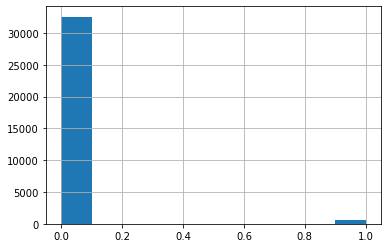

In [ ]:
train_csv.target.hist()

In [ ]:
test_csv.head()

,dcm_name,ID,sex,age,anatomy
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [ ]:
test_csv.columns = New_col_names[:5]
test_csv.head()

,img_name,ID,sex,age,anatomy
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [ ]:
print('Test Set')
print(test_csv.info())

Test Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   img_name  10982 non-null  object 
 1   ID        10982 non-null  object 
 2   sex       10982 non-null  object 
 3   age       10982 non-null  float64
 4   anatomy   10631 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB
None


In [ ]:
print("Total images in Train set: ",train_csv['img_name'].count())
print("Total images in Test set: ",test_csv['img_name'].count())

Total images in Train set:  33126
Total images in Test set:  10982


In [ ]:
print(f"The total patient ids are {train_csv['ID'].count()}, from those the unique ids are {train_csv['ID'].value_counts().shape[0]} ")

The total patient ids are 33126, from those the unique ids are 2056 


In [ ]:
columns = train_csv.keys()
columns = list(columns)
print(columns)

['img_name', 'ID', 'sex', 'age', 'anatomy', 'diagnosis', 'benign_malignant', 'target']


In [ ]:
# Check how many are males and how many females
anatomy = ['lower extremity', 'upper extremity', 'torso']
print(train_csv[(train_csv['anatomy'].isin(anatomy)) & (train_csv['target'] == 0)]['sex'].value_counts())
train_csv['sex'].fillna("male", inplace = True) 

male      15230
female    14523
Name: sex, dtype: int64


In [ ]:
anatomy = ['lower extremity', 'upper extremity', 'torso']
median = train_csv[(train_csv['anatomy'].isin(anatomy)) & (train_csv['target'] == 0) & (train_csv['sex'] == 'male')]['age'].median()
print('Median is:', median)

# Impute the missing values with male
train_csv['age'].fillna(median, inplace = True) 

Median is: 50.0


In [ ]:
train_csv['anatomy'].fillna('torso', inplace = True) 

In [ ]:
value = test_csv[test_csv['age'] == 70]['anatomy'].value_counts().reset_index()['index'][0]

# Impute the value
test_csv['anatomy'].fillna(value, inplace = True) 

In [ ]:
train_csv.to_csv('train_clean.csv', index=False)
test_csv.to_csv('test_clean.csv', index=False)

In [ ]:
# === TRAIN ===
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
to_encode = ['sex', 'anatomy', 'diagnosis']
encoded_all = []

label_encoder = LabelEncoder()

for column in to_encode:
    encoded = label_encoder.fit_transform(train_csv[column])
    encoded_all.append(encoded)
    
train_csv['sex'] = encoded_all[0]
train_csv['anatomy'] = encoded_all[1]
train_csv['diagnosis'] = encoded_all[2]

if 'benign_malignant' in train_csv.columns : train_csv.drop(['benign_malignant'], axis=1, inplace=True)

In [ ]:
# === TEST ===
to_encode = ['sex', 'anatomy']
encoded_all = []

label_encoder = LabelEncoder()

for column in to_encode:
    encoded = label_encoder.fit_transform(test_csv[column])
    encoded_all.append(encoded)
    
test_csv['sex'] = encoded_all[0]
test_csv['anatomy'] = encoded_all[1]

In [ ]:
train_csv.to_csv('train_clean.csv', index=False)
test_csv.to_csv('test_clean.csv', index=False)

In [ ]:
train_clean_csv = pd.read_csv("../working/train_clean.csv")
train_clean_csv.head()


,img_name,ID,sex,age,anatomy,diagnosis,target
0,ISIC_2637011,IP_7279968,1,45.0,0,8,0
1,ISIC_0015719,IP_3075186,0,45.0,5,8,0
2,ISIC_0052212,IP_2842074,0,50.0,1,5,0
3,ISIC_0068279,IP_6890425,0,45.0,0,8,0
4,ISIC_0074268,IP_8723313,0,55.0,5,8,0


In [ ]:
 !pip install efficientnet_pytorch torchtoolbox

     |████████████████████████████████| 58 kB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 876 kB 8.9 MB/s eta 0:00:01
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-py3-none-any.whl size=16035 sha256=f7286381679524465aa26cc61065037cf73769632b0e4211385eab4a2408fe15
  Stored in directory: /root/.cache/pip/wheels/b7/cc/0d/41d384b0071c6f46e542aded5f8571700ace4f1eb3f1591c29
  Created wheel for lmdb: filename=lmdb-1.0.0-cp37-cp37m-linux_x86_64.whl size=276744 sha256=5da2236d8796f745bca9ee870547eb8afc2c89f7db835be4363f3c8aedafc33e
  Stored in directory: /root/.cache/pip/wheels/12/e2/8d/261e2b6143cc3e0e690ccc065af68e44c43c26bc903ffa5d69
Successfully built efficientnet-pytorch lmdb
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:


import torch
import torchvision
import torch.nn.functional as F
import torch.nn as nn
import torchtoolbox.transform as transforms
from torch.utils.data import Dataset, DataLoader, Subset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold
import pandas as pd
import numpy as np
import gc
import os
import cv2
import time
import datetime
import warnings
import random
import matplotlib.pyplot as plt
import seaborn as sns
from efficientnet_pytorch import EfficientNet
warnings.simplefilter('ignore')
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(47)
%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
class MelanomaDataset(Dataset):
    def __init__(self, df: pd.DataFrame, imfolder: str, train: bool = True, transforms = None, meta_features = None):
        """
        Class initialization
        Args:
            df (pd.DataFrame): DataFrame with data description
            imfolder (str): folder with images
            train (bool): flag of whether a training dataset is being initialized or testing one
            transforms: image transformation method to be applied
            meta_features (list): list of features with meta information, such as sex and age
            
        """
        self.df = df
        self.imfolder = imfolder
        self.transforms = transforms
        self.train = train
        self.meta_features = meta_features
        
    def __getitem__(self, index):
        im_path = os.path.join(self.imfolder, self.df.iloc[index]['image_name'] + '.jpg')
        x = cv2.imread(im_path)
        meta = np.array(self.df.iloc[index][self.meta_features].values, dtype=np.float32)

        if self.transforms:
            x = self.transforms(x)
            
        if self.train:
            y = self.df.iloc[index]['target']
            return (x, meta), y
        else:
            return (x, meta)
    
    def __len__(self):
        return len(self.df)
    
    
class Net(nn.Module):
    def __init__(self, arch, n_meta_features: int):
        super(Net, self).__init__()
        self.arch = arch
        if 'ResNet' in str(arch.__class__):
            self.arch.fc = nn.Linear(in_features=512, out_features=500, bias=True)
        if 'EfficientNet' in str(arch.__class__):
            self.arch._fc = nn.Linear(in_features=1280, out_features=500, bias=True)
        self.meta = nn.Sequential(nn.Linear(n_meta_features, 500),
                                  nn.BatchNorm1d(500),
                                  nn.ReLU(),
                                  nn.Dropout(p=0.2),
                                  nn.Linear(500, 250),  # FC layer output will have 250 features
                                  nn.BatchNorm1d(250),
                                  nn.ReLU(),
                                  nn.Dropout(p=0.2))
        self.ouput = nn.Linear(500 + 250, 1)
        
    def forward(self, inputs):
        """
        No sigmoid in forward because we are going to use BCEWithLogitsLoss
        Which applies sigmoid for us when calculating a loss
        """
        x, meta = inputs
        cnn_features = self.arch(x)
        meta_features = self.meta(meta)
        features = torch.cat((cnn_features, meta_features), dim=1)
        output = self.ouput(features)
        return output

In [ ]:
class AdvancedHairAugmentation:
    """
    Impose an image of a hair to the target image

    Args:
        hairs (int): maximum number of hairs to impose
        hairs_folder (str): path to the folder with hairs images
    """

    def __init__(self, hairs: int = 5, hairs_folder: str = ""):
        self.hairs = hairs
        self.hairs_folder = hairs_folder

    def __call__(self, img):
        """
        Args:
            img (PIL Image): Image to draw hairs on.

        Returns:
            PIL Image: Image with drawn hairs.
        """
        n_hairs = random.randint(0, self.hairs)
        
        if not n_hairs:
            return img
        
        height, width, _ = img.shape  # target image width and height
        hair_images = [im for im in os.listdir(self.hairs_folder) if 'png' in im]
        
        for _ in range(n_hairs):
            hair = cv2.imread(os.path.join(self.hairs_folder, random.choice(hair_images)))
            hair = cv2.flip(hair, random.choice([-1, 0, 1]))
            hair = cv2.rotate(hair, random.choice([0, 1, 2]))

            h_height, h_width, _ = hair.shape  # hair image width and height
            roi_ho = random.randint(0, img.shape[0] - hair.shape[0])
            roi_wo = random.randint(0, img.shape[1] - hair.shape[1])
            roi = img[roi_ho:roi_ho + h_height, roi_wo:roi_wo + h_width]

            # Creating a mask and inverse mask
            img2gray = cv2.cvtColor(hair, cv2.COLOR_BGR2GRAY)
            ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
            mask_inv = cv2.bitwise_not(mask)

            # Now black-out the area of hair in ROI
            img_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

            # Take only region of hair from hair image.
            hair_fg = cv2.bitwise_and(hair, hair, mask=mask)

            # Put hair in ROI and modify the target image
            dst = cv2.add(img_bg, hair_fg)

            img[roi_ho:roi_ho + h_height, roi_wo:roi_wo + h_width] = dst
                
        return img

    def __repr__(self):
        return f'{self.__class__.__name__}(hairs={self.hairs}, hairs_folder="{self.hairs_folder}")'

In [ ]:
class DrawHair:
    """
    Draw a random number of pseudo hairs

    Args:
        hairs (int): maximum number of hairs to draw
        width (tuple): possible width of the hair in pixels
    """

    def __init__(self, hairs:int = 4, width:tuple = (1, 2)):
        self.hairs = hairs
        self.width = width

    def __call__(self, img):
        """
        Args:
            img (PIL Image): Image to draw hairs on.

        Returns:
            PIL Image: Image with drawn hairs.
        """
        if not self.hairs:
            return img
        
        width, height, _ = img.shape
        
        for _ in range(random.randint(0, self.hairs)):
            # The origin point of the line will always be at the top half of the image
            origin = (random.randint(0, width), random.randint(0, height // 2))
            # The end of the line 
            end = (random.randint(0, width), random.randint(0, height))
            color = (0, 0, 0)  # color of the hair. Black.
            cv2.line(img, origin, end, color, random.randint(self.width[0], self.width[1]))
        
        return img

    def __repr__(self):
        return f'{self.__class__.__name__}(hairs={self.hairs}, width={self.width})'

In [ ]:
class Microscope:
    """
    Cutting out the edges around the center circle of the image
    Imitating a picture, taken through the microscope

    Args:
        p (float): probability of applying an augmentation
    """

    def __init__(self, p: float = 0.5):
        self.p = p

    def __call__(self, img):
        """
        Args:
            img (PIL Image): Image to apply transformation to.

        Returns:
            PIL Image: Image with transformation.
        """
        if random.random() < self.p:
            circle = cv2.circle((np.ones(img.shape) * 255).astype(np.uint8), # image placeholder
                        (img.shape[0]//2, img.shape[1]//2), # center point of circle
                        random.randint(img.shape[0]//2 - 3, img.shape[0]//2 + 15), # radius
                        (0, 0, 0), # color
                        -1)

            mask = circle - 255
            img = np.multiply(img, mask)
        
        return img

    def __repr__(self):
        return f'{self.__class__.__name__}(p={self.p})'

In [ ]:
train_transform = transforms.Compose([
    AdvancedHairAugmentation(hairs_folder='/kaggle/input/melanoma-hairs'),
    transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    Microscope(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

In [ ]:
arch = EfficientNet.from_pretrained('efficientnet-b1')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/checkpoints/efficientnet-b1-f1951068.pth



Loaded pretrained weights for efficientnet-b1


In [ ]:
train_df = pd.read_csv('/kaggle/input/jpeg-melanoma-256x256/train.csv')
test_df = pd.read_csv('/kaggle/input/jpeg-melanoma-256x256/test.csv')

In [ ]:
#  One-hot encoding of anatom_site_general_challenge feature
concat = pd.concat([train_df['anatom_site_general_challenge'], test_df['anatom_site_general_challenge']], ignore_index=True)
dummies = pd.get_dummies(concat, dummy_na=True, dtype=np.uint8, prefix='site')
train_df = pd.concat([train_df, dummies.iloc[:train_df.shape[0]]], axis=1)
test_df = pd.concat([test_df, dummies.iloc[train_df.shape[0]:].reset_index(drop=True)], axis=1)

# Sex features
train_df['sex'] = train_df['sex'].map({'male': 1, 'female': 0})
test_df['sex'] = test_df['sex'].map({'male': 1, 'female': 0})
train_df['sex'] = train_df['sex'].fillna(-1)
test_df['sex'] = test_df['sex'].fillna(-1)

# Age features
train_df['age_approx'] /= train_df['age_approx'].max()
test_df['age_approx'] /= test_df['age_approx'].max()
train_df['age_approx'] = train_df['age_approx'].fillna(0)
test_df['age_approx'] = test_df['age_approx'].fillna(0)

train_df['patient_id'] = train_df['patient_id'].fillna(0)

In [ ]:


meta_features = ['sex', 'age_approx'] + [col for col in train_df.columns if 'site_' in col]
meta_features.remove('anatom_site_general_challenge')



In [ ]:
test = MelanomaDataset(df=test_df,
                       imfolder='/kaggle/input/melanoma-external-malignant-256/test/test/', 
                       train=False,
                       transforms=train_transform,  # For TTA
                       meta_features=meta_features)

In [ ]:
skf = GroupKFold(n_splits=5)


In [ ]:
epochs = 12  # Number of epochs to run
es_patience = 3  # Early Stopping patience - for how many epochs with no improvements to wait
TTA = 3 # Test Time Augmentation rounds

oof = np.zeros((len(train_df), 1))  # Out Of Fold predictions
preds = torch.zeros((len(test), 1), dtype=torch.float32, device=device)  # Predictions for test test

skf = KFold(n_splits=5, shuffle=True, random_state=47)
for fold, (train_idx, val_idx) in enumerate(skf.split(X=np.zeros(len(train_df)), y=train_df['target'], groups=train_df['patient_id'].tolist()), 1):
    print('=' * 20, 'Fold', fold, '=' * 20)  
    
    model_path = f'model_{fold}.pth'  # Path and filename to save model to
    best_val = 0  # Best validation score within this fold
    patience = es_patience  # Current patience counter
    arch = EfficientNet.from_pretrained('efficientnet-b1')
    model = Net(arch=arch, n_meta_features=len(meta_features))  # New model for each fold
    model = model.to(device)
    
    optim = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer=optim, mode='max', patience=1, verbose=True, factor=0.2)
    criterion = nn.BCEWithLogitsLoss()
    
    train = MelanomaDataset(df=train_df.iloc[train_idx].reset_index(drop=True), 
                            imfolder='/kaggle/input/melanoma-external-malignant-256/train/train/', 
                            train=True, 
                            transforms=train_transform,
                            meta_features=meta_features)
    val = MelanomaDataset(df=train_df.iloc[val_idx].reset_index(drop=True), 
                            imfolder='/kaggle/input/melanoma-external-malignant-256/train/train/', 
                            train=True, 
                            transforms=test_transform,
                            meta_features=meta_features)
    
    train_loader = DataLoader(dataset=train, batch_size=64, shuffle=True, num_workers=2)
    val_loader = DataLoader(dataset=val, batch_size=16, shuffle=False, num_workers=2)
    test_loader = DataLoader(dataset=test, batch_size=16, shuffle=False, num_workers=2)
    
    for epoch in range(epochs):
        start_time = time.time()
        correct = 0
        epoch_loss = 0
        model.train()
        
        for x, y in train_loader:
            x[0] = torch.tensor(x[0], device=device, dtype=torch.float32)
            x[1] = torch.tensor(x[1], device=device, dtype=torch.float32)
            y = torch.tensor(y, device=device, dtype=torch.float32)
            optim.zero_grad()
            z = model(x)
            loss = criterion(z, y.unsqueeze(1))
            loss.backward()
            optim.step()
            pred = torch.round(torch.sigmoid(z))  # round off sigmoid to obtain predictions
            correct += (pred.cpu() == y.cpu().unsqueeze(1)).sum().item()  # tracking number of correctly predicted samples
            epoch_loss += loss.item()
        train_acc = correct / len(train_idx)
        
        model.eval()  # switch model to the evaluation mode
        val_preds = torch.zeros((len(val_idx), 1), dtype=torch.float32, device=device)
        with torch.no_grad():  # Do not calculate gradient since we are only predicting
            # Predicting on validation set
            for j, (x_val, y_val) in enumerate(val_loader):
                x_val[0] = torch.tensor(x_val[0], device=device, dtype=torch.float32)
                x_val[1] = torch.tensor(x_val[1], device=device, dtype=torch.float32)
                y_val = torch.tensor(y_val, device=device, dtype=torch.float32)
                z_val = model(x_val)
                val_pred = torch.sigmoid(z_val)
                val_preds[j*val_loader.batch_size:j*val_loader.batch_size + x_val[0].shape[0]] = val_pred
            val_acc = accuracy_score(train_df.iloc[val_idx]['target'].values, torch.round(val_preds.cpu()))
            val_roc = roc_auc_score(train_df.iloc[val_idx]['target'].values, val_preds.cpu())
            
            print('Epoch {:03}: | Loss: {:.3f} | Train acc: {:.3f} | Val acc: {:.3f} | Val roc_auc: {:.3f} | Training time: {}'.format(
            epoch + 1, 
            epoch_loss, 
            train_acc, 
            val_acc, 
            val_roc, 
            str(datetime.timedelta(seconds=time.time() - start_time))[:7]))
            
            scheduler.step(val_roc)
                
            if val_roc >= best_val:
                best_val = val_roc
                patience = es_patience  # Resetting patience since we have new best validation accuracy
                torch.save(model, model_path)  # Saving current best model
            else:
                patience -= 1
                if patience == 0:
                    print('Early stopping. Best Val roc_auc: {:.3f}'.format(best_val))
                    break
                
    model = torch.load(model_path)  # Loading best model of this fold
    model.eval()  # switch model to the evaluation mode
    val_preds = torch.zeros((len(val_idx), 1), dtype=torch.float32, device=device)
    with torch.no_grad():
        # Predicting on validation set once again to obtain data for OOF
        for j, (x_val, y_val) in enumerate(val_loader):
            x_val[0] = torch.tensor(x_val[0], device=device, dtype=torch.float32)
            x_val[1] = torch.tensor(x_val[1], device=device, dtype=torch.float32)
            y_val = torch.tensor(y_val, device=device, dtype=torch.float32)
            z_val = model(x_val)
            val_pred = torch.sigmoid(z_val)
            val_preds[j*val_loader.batch_size:j*val_loader.batch_size + x_val[0].shape[0]] = val_pred
        oof[val_idx] = val_preds.cpu().numpy()
        
        # Predicting on test set
        tta_preds = torch.zeros((len(test), 1), dtype=torch.float32, device=device)
        for _ in range(TTA):
            for i, x_test in enumerate(test_loader):
                x_test[0] = torch.tensor(x_test[0], device=device, dtype=torch.float32)
                x_test[1] = torch.tensor(x_test[1], device=device, dtype=torch.float32)
                z_test = model(x_test)
                z_test = torch.sigmoid(z_test)
                tta_preds[i*test_loader.batch_size:i*test_loader.batch_size + x_test[0].shape[0]] += z_test
        preds += tta_preds / TTA
    
preds /= skf.n_splits

==================== Fold 1 ====================
Loaded pretrained weights for efficientnet-b1
Epoch 001: | Loss: 36.435 | Train acc: 0.982 | Val acc: 0.984 | Val roc_auc: 0.848 | Training time: 0:13:33
Epoch 002: | Loss: 32.293 | Train acc: 0.982 | Val acc: 0.984 | Val roc_auc: 0.827 | Training time: 0:11:16
Epoch 003: | Loss: 31.153 | Train acc: 0.982 | Val acc: 0.984 | Val roc_auc: 0.855 | Training time: 0:11:43
Epoch 004: | Loss: 31.085 | Train acc: 0.982 | Val acc: 0.984 | Val roc_auc: 0.828 | Training time: 0:13:26
Epoch 005: | Loss: 30.249 | Train acc: 0.982 | Val acc: 0.983 | Val roc_auc: 0.838 | Training time: 0:12:54
Epoch     5: reducing learning rate of group 0 to 2.0000e-04.
Epoch 006: | Loss: 27.499 | Train acc: 0.982 | Val acc: 0.984 | Val roc_auc: 0.886 | Training time: 0:13:17
Epoch 007: | Loss: 26.915 | Train acc: 0.982 | Val acc: 0.983 | Val roc_auc: 0.881 | Training time: 0:13:59
Epoch 008: | Loss: 25.386 | Train acc: 0.982 | Val acc: 0.982 | Val roc_auc: 0.874 | Tr

KeyboardInterrupt: 

In [ ]:
print('OOF: {:.3f}'.format(roc_auc_score(train_df['target'], oof)))

OOF: 0.542


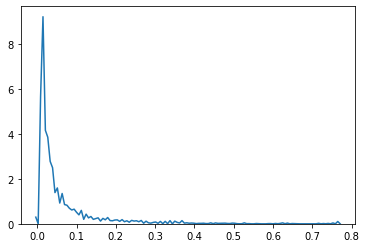

In [ ]:
sns.kdeplot(pd.Series(preds.cpu().numpy().reshape(-1,)));

In [ ]:


# Saving OOF predictions so stacking would be easier
pd.Series(oof.reshape(-1,)).to_csv('oof.csv', index=False)



sub = pd.read_csv('/kaggle/input/siim-isic-melanoma-classification/sample_submission.csv')
sub['target'] = preds.cpu().numpy().reshape(-1,)
sub.to_csv('submission.csv', index=False)